In [3]:
%pip install davos
import davos

davos.config.suppress_stdout = True

Note: you may need to restart the kernel to use updated packages.


In [5]:
smuggle numpy as np               # pip: numpy==1.24.2
smuggle matplotlib.pyplot as plt  # pip: matplotlib==3.7.0
smuggle pandas as pd              # pip: pandas==1.5.3
smuggle seaborn as sns            # pip: seaborn==0.12.2

import os

In [8]:
os.path.join(os.path.split(os.path.split(os.getcwd())[0])[0], 'data')

'/Users/jmanning/pca_paper/data'

In [12]:
datadir = os.path.join(os.path.split(os.path.split(os.getcwd())[0])[0], 'data')
pie1 = os.path.join(datadir, 'images', 'pie_photo.jpg')
pie2 = os.path.join(datadir, 'images', 'pie_drawing.jpg')

Pie photo

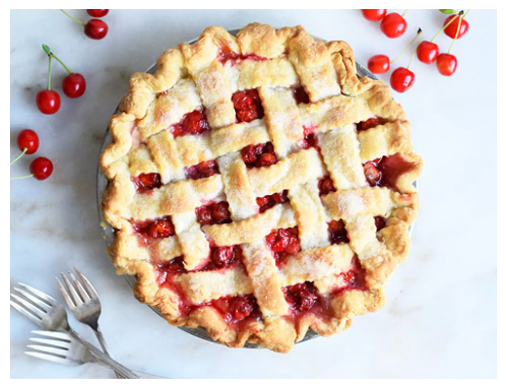

In [16]:
plt.imshow(plt.imread(pie1))
plt.axis('off');

Pie drawing

(-0.5, 499.5, 379.5, -0.5)

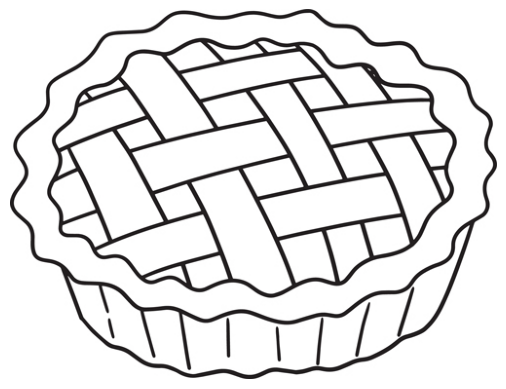

In [17]:
plt.imshow(plt.imread(pie2))
plt.axis('off')